In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Import Data 
path = '/Users/Administrator/Desktop/'
file = pd.read_csv(path + 'term-deposit-marketing-2020.csv')
DF = pd.DataFrame(file)
#displaying data
DF.head(36)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,no


In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [4]:
DF.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [3]:
y = DF['y']

In [4]:
ynumbs= []
for i in y: 
    if i == 'yes': 
       ynumbs.append(1) 
    elif i == 'no': 
       ynumbs.append(0) 

In [5]:
DF['y'] = ynumbs

In [6]:
DF['y'].value_counts()

0    37104
1     2896
Name: y, dtype: int64

In [7]:

# check version number
import imblearn
from imblearn.over_sampling import SMOTE
X = DF.loc[:,DF.columns!='y']

from sklearn.preprocessing import OneHotEncoder
dfcat = X.select_dtypes(include ='object') 
enc = OneHotEncoder(sparse=False)
X_transdf = enc.fit_transform(dfcat)
# transform the dataset
oversample = SMOTE()
X_transdf, ynumbs = oversample.fit_resample(X_transdf, ynumbs)

In [64]:
X_transdf.shape

(74208, 39)

In [8]:
from collections import Counter
counter = Counter(ynumbs)
print(counter)

Counter({0: 37104, 1: 37104})


In [9]:
# Split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transdf, ynumbs, test_size=0.3)

In [10]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(i) for i in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(j) for j in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [11]:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfclf = RandomForestClassifier(max_depth=10)
# Random search of parameters, using 3 fold cross validation, 
# search across  different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rfclf, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [12]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [13]:
best_random = rf_random.best_estimator_
best_random

RandomForestClassifier(max_depth=90, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=1800)

In [14]:
from sklearn.metrics import classification_report
predictiontrain = best_random.predict(X_train)

print(classification_report(y_train, predictiontrain))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82     25923
           1       0.83      0.77      0.80     26022

    accuracy                           0.81     51945
   macro avg       0.81      0.81      0.81     51945
weighted avg       0.81      0.81      0.81     51945



To increase Recall Performance on Subscribtion

In [15]:
from sklearn.metrics import classification_report
predictiontest = best_random.predict(X_test)

print(classification_report(y_test, predictiontest))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81     11181
           1       0.82      0.76      0.79     11082

    accuracy                           0.80     22263
   macro avg       0.80      0.80      0.80     22263
weighted avg       0.80      0.80      0.80     22263



In [18]:
Pred = best_random.predict(X_test)


In [27]:
Predtrain = best_random.predict(X_train)
Predtrain

array([1, 1, 1, ..., 0, 0, 0])

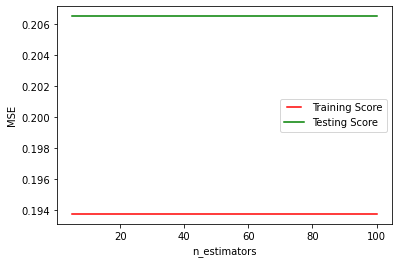

In [29]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

train_results = []
test_results = []
list_nb_trees = [5, 10, 15, 30, 45, 60, 80, 100]

for nb_trees in list_nb_trees:
    rfclf = RandomForestClassifier(n_estimators=nb_trees)
    rfclf.fit(X_train, y_train)

    train_results.append(mean_squared_error(y_train, Predtrain))
    test_results.append(mean_squared_error(y_test, Pred))

line1, = plt.plot(list_nb_trees, train_results, color="r", label="Training Score")
line2, = plt.plot(list_nb_trees, test_results, color="g", label="Testing Score")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MSE')
plt.xlabel('n_estimators')
plt.show()

In [33]:
DF = DF[:14842]

In [34]:
DF.insert(14, 'Predicted', Pred)

In [35]:
DF.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,Predicted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,0


score feature importances Done

In [37]:
importance = best_random.feature_importances_[:13]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.02721
Feature: 1, Score: 0.03871
Feature: 2, Score: 0.02160
Feature: 3, Score: 0.01560
Feature: 4, Score: 0.03356
Feature: 5, Score: 0.02056
Feature: 6, Score: 0.02038
Feature: 7, Score: 0.02895
Feature: 8, Score: 0.00837
Feature: 9, Score: 0.03472
Feature: 10, Score: 0.01925
Feature: 11, Score: 0.00512
Feature: 12, Score: 0.02129


<BarContainer object of 13 artists>

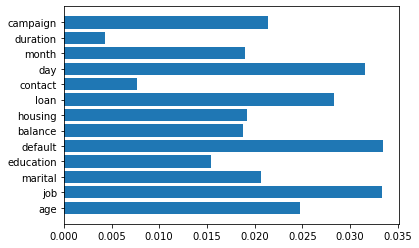

In [27]:
index=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign']
dsetfeat = pd.DataFrame(DF, index=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign'],  columns=index)
plt.barh(dsetfeat.index, best_random.feature_importances_[:13])


SHAP analysis






In [ ]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(best_random)

# Calculate Shap values
shap_values = explainer.shap_values(X_test)

In [ ]:
# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test)

In [54]:
#NotSubscribed = DF.ynumb.loc[DF.ynumb == 0]
Subscribed = DF.y.loc[DF.y == 1]
SubcribeFiltered = Subscribed[:2896] 
SubcribeFiltered 

83       1
86       1
87       1
129      1
168      1
        ..
39986    1
39988    1
39990    1
39996    1
39997    1
Name: y, Length: 2896, dtype: int64

In [39]:
X_test.shape

(22263, 39)

Confusion Matrix on Test set and reduce number of rows of calls on  confusion matrix prediction Done


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


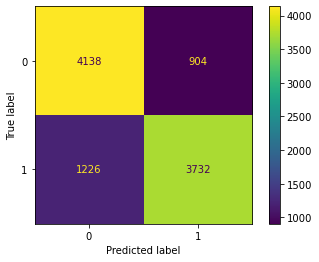

In [40]:
#y_pred_ = [0 if preds[i] <= 0.5 else 1 for i in range(len(preds))]


from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_random, X_test[:10000], y_test[:10000])  
plt.show() 

Unsupervised Clustering Kmeans who will subscribe Done
what makes people buy a product

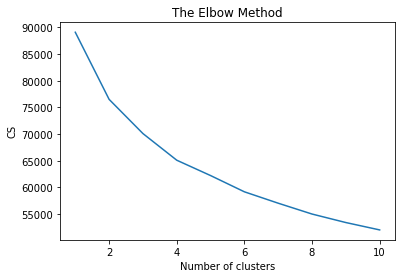

In [44]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_test)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [48]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,random_state=0)

kmeans.fit(X_test)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y_test[:22263] == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 7095 out of 40000 samples were correctly labeled.
Accuracy score: 0.18


In [65]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_transdf)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
DF['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(DF.groupby('cluster').mean(),1))
kmeans_mean_cluster

,age,balance,day,duration,campaign,y
cluster,,,,,,
1,43.8,1301.2,16.3,246.5,3.1,0.1
2,39.2,1076.8,15.5,262.3,2.6,0.1
3,39.4,1051.0,15.8,257.2,2.9,0.0
4,39.7,1711.1,16.6,252.8,3.0,0.1


In [72]:
label = y_kmeans[:40000] 

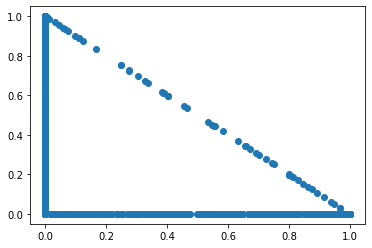

In [82]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label = X_transdf[y_kmeans  == 1]
#plotting the results
plt.scatter(filtered_label[:,0] , filtered_label[:,1])
plt.show()

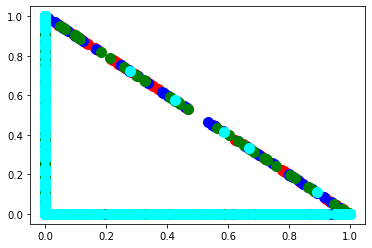

In [80]:
plt.scatter(X_transdf[y_kmeans ==0, 0], X_transdf[y_kmeans ==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X_transdf[y_kmeans ==1, 0], X_transdf[y_kmeans ==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X_transdf[y_kmeans==2, 0], X_transdf[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X_transdf[y_kmeans==3, 0], X_transdf[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X_transdf[y_kmeans==4, 0], X_transdf[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

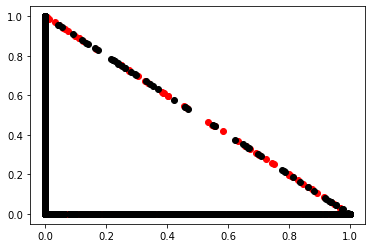

In [83]:
#filter rows of original data
filtered_label2 = X_transdf[y_kmeans == 1]
 
filtered_label8 = X_transdf[y_kmeans == 0]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

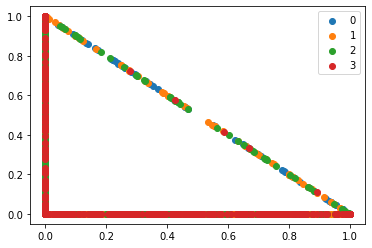

In [84]:
#Getting unique labels
 
u_labels = np.unique(y_kmeans)
 
#plotting the results:

for i in u_labels:
    plt.scatter(X_transdf[y_kmeans == i , 0] , X_transdf[y_kmeans == i , 1] , label = i)
plt.legend()
plt.show()